In [15]:
import pygrib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import os
%matplotlib inline

    
plt.rcParams['figure.figsize'] =(12,10)

In [80]:
import ftplib
ftp = ftplib.FTP("nomads.ncdc.noaa.gov")
ftp.login()
ftp.cwd("/GDAS/201601")
for f in ftp.nlst():
    print f

20161101
20161102
20161103
20161104
20161106
20161105
20161107
20161108
20161109
20161110
20161111
20161112
20161113
20161114
20161130
20161129
20161128


In [2]:

hours = ['00','06','12','18']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
years = ['2016', '2017']
url_query = []

def get_url():

    import ftplib
    ftp = ftplib.FTP("nomads.ncdc.noaa.gov")
    ftp.login()
    ftp.cwd("/GDAS/")
    for f in ftp.nlst():
        if f.startswith('2'):
            if f[0:4] in years:
                yr = f[2:4]
                year = f[0:4]
            if f[4:6] in months:
                mn = f[4:6]
                month = f[4:6]
            ftp.cwd("/GDAS/{0}{1}".format(year, month))
            for l in ftp.nlst():
                for h in hours:
                    ftp.cwd("/GDAS/{0}{1}/{2}".format(year, month, l))
                    base_url = "ftp://nomads.ncdc.noaa.gov/GDAS/{0}{1}/{2}/".format(year, month, l)
                    data_url = "gdas1.t{0}z.pgrb2.1p00.anl".format(h)
                    url = base_url + data_url
                    url_query.append(url)
                    

In [144]:
#May take a while to load
#get_url()
print url_query[1095]
# NO: 00, 06, 12 12/07/16, 12 24/08, 00 3/11/16, 00 03/12, 18 07/12/16, 00 12/12, 12 05/03

ftp://nomads.ncdc.noaa.gov/GDAS/201703/20170318/gdas1.t18z.pgrb2.1p00.anl


In [142]:
import urllib2
import pygrib

#for n in url_query[1095:]:
    year1 = n[34:36]
    month1 = n[36:38]
    day1 = n[45:47]
    hour1 = n[55:57]
    url = n
    file_name = url.split('/')[-1]
    u = urllib2.urlopen(url)
    f = open(file_name, 'wb')
    #meta = u.info()
    #file_size = int(meta.getheaders("Content-Length")[0])
    #print "Downloading: %s Bytes: %s" % (file_name, file_size)
    file_size_dl = 0
    block_sz = 8192
    while True:
        buffer = u.read(block_sz)
        if not buffer:
            break
        file_size_dl += len(buffer)
        f.write(buffer)
    f.close()
    
    grib= './{0}'.format(file_name) # Set the file name of your input GRIB file
    grbs=pygrib.open(grib)
    grb = grbs.select()[100]
    data=grb.values
    df = pd.DataFrame(data) 
    df.to_csv(os.path.join('data','{0}_{1}_{2}_{3}.csv'.format(hour1,day1, month1 ,year1)), index = False)
    os.remove(grib)
    print '{0}_{1}_{2}_{3}'.format(hour1,day1, month1 ,year1)

18_05_03_17
00_06_03_17
06_06_03_17
12_06_03_17
18_06_03_17
00_07_03_17
06_07_03_17
12_07_03_17
18_07_03_17
00_08_03_17
06_08_03_17
12_08_03_17
18_08_03_17
00_09_03_17
06_09_03_17
12_09_03_17
18_09_03_17
00_10_03_17
06_10_03_17
12_10_03_17
18_10_03_17
00_11_03_17
06_11_03_17
12_11_03_17
18_11_03_17
00_12_03_17
06_12_03_17
12_12_03_17
18_12_03_17
00_13_03_17
06_13_03_17
12_13_03_17
18_13_03_17
00_14_03_17
06_14_03_17
12_14_03_17
18_14_03_17
00_15_03_17
06_15_03_17
12_15_03_17
18_15_03_17
00_16_03_17
06_16_03_17
12_16_03_17
18_16_03_17
00_17_03_17
06_17_03_17
12_17_03_17
18_17_03_17
00_18_03_17
06_18_03_17
12_18_03_17
18_18_03_17


In [ ]:
hours = ['00','06','12','18']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
years = ['2016', '2017']

import ftplib
ftp = ftplib.FTP("nomads.ncdc.noaa.gov")
ftp.login()
ftp.cwd("/GDAS/")
file_name = url.split('/')[-1]
u = urllib2.urlopen(url)
fi = open(file_name, 'wb')
# meta = u.info()
#             file_size = int(meta.getheaders("Content-Length")[0])
#             print "Downloading: %s Bytes: %s" % (file_name, file_size)

# file_size_dl = 0
# block_sz = 8192
#                 while True:
#                     buffer = u.read(block_sz)
#                 if not buffer:
#                     break

#                 file_size_dl += len(buffer)
                fi.write(buffer)
#     status = r"%10d  [%3.2f%%]" % (file_size_dl, file_size_dl * 100. / file_size)
#     status = status + chr(8)*(len(status)+1)
#     print status,

#                 fi.close()
                import pygrib as grib
                grib= './{0}'.format(file_name) # Set the file name of your input GRIB file
                grbs=pygrib.open(grib)
                grb = grbs.select()[100]
                print grb
                data=grb.values
                df = pd.DataFrame(data)
                day1 = l[6:8]
                month1 = l[4:6]
                year1 = l[2:4]
                df.to_csv(os.path.join('data','{0}_{1}_{2}_{3}.csv'.format(h,day1, month1 ,year1)), index = False)
                os.remove(grib)

In [105]:
hours = ['00','06','12','18']
# days = ['01','02','03','04','05','06','07','08','09','10',\
#         '11','12','13','14','15','16','17','18','19','20',\
#         '21','22','23','24','25','26','27','28','29', '30','31']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
years = ['2016', '2017']
# gdas1.t00z.pgrb2.1p00.anl

import ftplib
ftp = ftplib.FTP("nomads.ncdc.noaa.gov")
ftp.login()
ftp.cwd("/GDAS/")
for x in range(2):
for f in ftp.nlst():
    if f.startswith('2'):
        if f[0:4] in years:
            yr = f[2:4]
            year = f[0:4]
        if f[4:6] in months:
            mn = f[4:6]
            month = f[4:6]
        ftp.cwd("/GDAS/{0}{1}".format(year, month))
        for l in ftp.nlst():
            for h in hours:
                ftp.cwd("/GDAS/{0}{1}/{2}".format(year, month, l))
                base_url = "ftp://nomads.ncdc.noaa.gov/GDAS/{0}{1}/{2}/".format(year, month, l)
                data_url = "gdas1.t{0}z.pgrb2.1p00.anl".format(h)
                url = base_url + data_url
                file_name = url.split('/')[-1]
                u = urllib2.urlopen(url)
                fi = open(file_name, 'wb')
                meta = u.info()
#             file_size = int(meta.getheaders("Content-Length")[0])
#             print "Downloading: %s Bytes: %s" % (file_name, file_size)

                file_size_dl = 0
                block_sz = 8192
                while True:
                    buffer = u.read(block_sz)
                if not buffer:
                    break

                file_size_dl += len(buffer)
                fi.write(buffer)
#     status = r"%10d  [%3.2f%%]" % (file_size_dl, file_size_dl * 100. / file_size)
#     status = status + chr(8)*(len(status)+1)
#     print status,

                fi.close()
                import pygrib as grib
                grib= './{0}'.format(file_name) # Set the file name of your input GRIB file
                grbs=pygrib.open(grib)
                grb = grbs.select()[100]
                print grb
                data=grb.values
                df = pd.DataFrame(data)
                day1 = l[6:8]
                month1 = l[4:6]
                year1 = l[2:4]
                df.to_csv(os.path.join('data','{0}_{1}_{2}_{3}.csv'.format(h,day1, month1 ,year1)), index = False)
                os.remove(grib)
            
# import ftplib
# ftp = ftplib.FTP("nomads.ncdc.noaa.gov")
# ftp.login()
# ftp.cwd("/GDAS/")
#ftp.nlst()


# files = []

# try:
#     files = ftp.nlst()
# except ftplib.error_perm, resp:
#     if str(resp) == "550 No files found":
#         print "No files in this directory"
#     else:
#         raise

# for f in files:
#     print f

ftp://nomads.ncdc.noaa.gov/GDAS/201605/20160530/gdas1.t00z.pgrb2.1p00.anl


KeyboardInterrupt: 

ValueError: no matches found

In [148]:
DIR = 'grib_files'
num_files = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
hours = ['00','06','12','18']
days = ['01','02','03','04','05','06','07','08','09','10',\
        '11','12','13','14','15','16','17','18','19','20',\
        '21','22','23','24','25','26','27','28','29', '30','31']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
years = ['16', '17']

# for i in range(num_files):
for a in os.listdir(DIR):
    if a.startswith('.'):
        print 'skipped'
        continue
    else: 
        if a[0:2] in hours:
            hour = a[0:2]
        if a[3:5] in days:
            day = a[3:5]
        if a[6:9] in months:
            month = a[6:9]
        if a[10:13] in years:
            year = a[10:13]
        grib = os.path.join('grib_files', '{0}_{1}_{2}_{3}'.format(hour, day, month ,year))
        myfile = pygrib.open(grib)
        grb = myfile.select()[100]
        print grb
        data=grb.values
        df = pd.DataFrame(data)
        df.to_csv(os.path.join('data','{0}_{1}_{2}_{3}.csv'.format(hour,day, month ,year)), index = False)
        os.remove(grib)
        print 'file removed!'

skipped


In [ ]:
df

In [51]:
# grib = os.path.join('grib_files', '24_05_16')
# myfile = pygrib.open(grib)

In [43]:
# for i in myfile:
#     print i

In [44]:
# index 100 = for v-wind at 30,000 pa OR 300 mbar
grb = myfile.select()[100]
data=grb.values

print grb

101:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 30000 Pa:fcst time 0 hrs:from 201605240000


In [45]:
# Subsetting
df = pd.DataFrame(data)
#study_area = example_df.loc[30:75,220:300]




In [46]:
# Transforming 
a = []
b = 0
c = []
for x in study_area.T:
    print x
    for i in study_area.T[x]:
        b += i
    a.append(b)
    c = a
    b = 0

NameError: name 'study_area' is not defined

In [25]:
grbs=pygrib.open('15March')
grb = grbs.select()[1]
print grb
data=grb.values

2:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201703150000


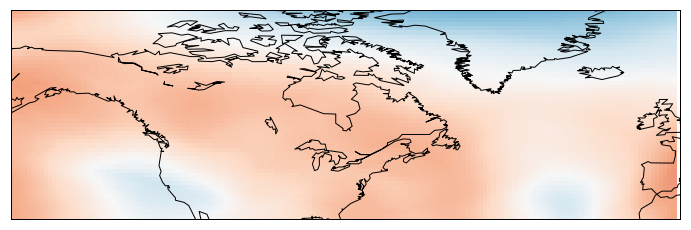

In [26]:
# Mapping
lat,lon = grb.latlons()

m=Basemap(projection='cyl', llcrnrlon=200, \
          urcrnrlon=360.,llcrnrlat=30,urcrnrlat=80, \
          resolution='c')# change
    
x, y = m(lon,lat)

cs = m.pcolormesh(x,y,data,shading='flat',cmap='RdBu_r');#,cmap=plt.cm.hot)#, )

m.drawcoastlines()
m.drawmapboundary()
# m.drawgreatcircle(lon1=0,lat1=-60, lon2=360, lat2=60,color='w')
# m.drawgreatcircle(lon1=0,lat1=-60, lon2=360, lat2=20,color='w')
# parallels = np.arange(0.,81,1.)
# meridians = np.arange(10.,351.,4.)
#m.drawmeridians(meridians,labels=[True,False,False,True]);
#m.drawparallels(parallels,labels=[False,True,True,False]);
# labels = [left,right,top,bottom]

#plt.title("19th February 00:00")
#plt.savefig('19th_00:00') 
#plt.close()

In [ ]:
#grbout = open('test.grb','wb')
#grbout.write(grb)
#grbout.close()

In [48]:
df.to_csv(os.path.join('data','24_May_16.csv'), index = False)

In [49]:
pd.read_csv(os.path.join('data','24_May_16.csv'))

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,-2.100000,-1.800000,-1.500000,-1.200000,-0.900000,-0.600000,-0.300000,0.000000,0.300000,0.600000,...,-5.000000,-4.800000,-4.500000,-4.200000,-3.900000,-3.600000,-3.300000,-3.000000,-2.700000,-2.400000
1,-0.400000,-0.100000,0.200000,0.500000,0.700000,1.000000,1.300000,1.600000,1.900000,2.100000,...,-3.600000,-3.300000,-2.900000,-2.600000,-2.300000,-2.000000,-1.700000,-1.300000,-1.000000,-0.700000
2,3.000000,3.200000,3.500000,3.700000,4.000000,4.200000,4.400000,4.600000,4.800000,4.900000,...,-0.500000,-0.100000,0.300000,0.600000,1.000000,1.400000,1.700000,2.000000,2.400000,2.700000
3,5.800000,6.000000,6.100000,6.200000,6.300000,6.400000,6.500000,6.700000,6.800000,6.900000,...,3.500000,3.800000,4.100000,4.400000,4.700000,4.900000,5.100000,5.300000,5.500000,5.700000
4,9.600000,9.400001,9.200000,8.900001,8.600000,8.300000,7.900000,7.500000,7.100000,6.700000,...,8.400001,8.700000,9.100000,9.300000,9.500000,9.700000,9.800000,9.800000,9.800000,9.700000
5,11.200000,10.700000,10.100000,9.500000,8.900001,8.200000,7.500000,6.900000,6.200000,5.400000,...,12.600000,12.900001,13.100000,13.200000,13.100000,13.000000,12.800000,12.500000,12.100000,11.700000
6,9.300000,8.700000,8.100000,7.400000,6.800000,6.200000,5.500000,4.900000,4.200000,3.500000,...,13.700000,13.400001,13.100000,12.700000,12.300000,11.800000,11.400001,10.900001,10.400001,9.800000
7,5.900000,5.500000,5.000000,4.600000,4.100000,3.600000,3.100000,2.600000,2.100000,1.500000,...,9.300000,9.000000,8.700000,8.400001,8.100000,7.800000,7.400000,7.100000,6.700000,6.300000
8,3.100000,2.800000,2.500000,2.200000,1.900000,1.600000,1.300000,1.000000,0.700000,0.400000,...,5.200000,5.100000,4.900000,4.800000,4.600000,4.300000,4.100000,3.900000,3.600000,3.300000
9,1.000000,0.900000,0.700000,0.600000,0.400000,0.300000,0.200000,0.000000,-0.100000,-0.200000,...,2.500000,2.300000,2.200000,2.000000,1.800000,1.700000,1.600000,1.400000,1.300000,1.100000


In [ ]:
# # download files
# import urllib2
# from scrapy.selector import Selector
# from scrapy.http import HtmlResponse

# # TODO construct a func that returns multiple base_urls
base_url ="ftp://nomads.ncdc.noaa.gov/GDAS/201607/20160725/"

# # TODO scrape NOAA website, retrieve list of file names (a.k.a data_url)
data_url = "gdas1.t00z.pgrb2.1p00.anl"

# url_to_call = base_url + data_url
    
import urllib2
    
    
    
url = base_url + data_url

file_name = url.split('/')[-1]
u = urllib2.urlopen(url)
f = open(file_name, 'wb')
#meta = u.info()
#file_size = int(meta.getheaders("Content-Length")[0])
#print "Downloading: %s Bytes: %s" % (file_name, file_size)

file_size_dl = 0
block_sz = 8192
while True:
    buffer = u.read(block_sz)
    if not buffer:
        break

    file_size_dl += len(buffer)
    f.write(buffer)
#     status = r"%10d  [%3.2f%%]" % (file_size_dl, file_size_dl * 100. / file_size)
#     status = status + chr(8)*(len(status)+1)
#     print status,

f.close()

print file_name 
print url 
import pygrib
grib= './{0}'.format(file_name) # Set the file name of your input GRIB file
grbs=pygrib.open(grib)
grb = grbs.select()[100]
data=grb.values
df = pd.DataFrame(data)

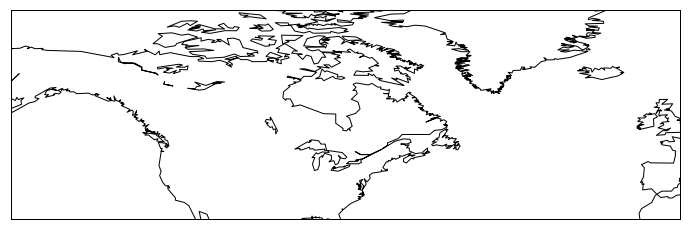

In [13]:
m=Basemap(projection='cyl', llcrnrlon=200, \
          urcrnrlon=360.,llcrnrlat=30,urcrnrlat=80, \
          resolution='c')
m.drawcoastlines()
m.drawmapboundary()
plt.savefig('StudyArea.png')